In [1]:
%matplotlib inline

import numpy as np
from scipy import misc
import cv2
import uuid
import os, shutil
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer

In [2]:
# extract lines from pages
page_num = 2
for page_idx in range(page_num):
    
    # recreate the dir to save the extracted lines
    dst_dir = "page_lines/" + str(page_idx)
    if os.path.isdir(dst_dir):
        shutil.rmtree(dst_dir)
    os.makedirs(dst_dir)
    
    image = misc.imread("pages/" + str(page_idx) + ".png", mode="L")
    binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 23) 
    kernel = np.ones((13,13), np.uint8)
    binary_erode = cv2.erode(binary, kernel, iterations = 1)
    output = cv2.connectedComponents(255 - binary_erode, 4, cv2.CV_32S)
    line_num = output[0]
    
    # for each line, rotate to make horizontal and extract it
    for line_idx in range(1, line_num):
        line_mask = np.where(output[1] == line_idx, output[1], 255).astype('uint8')
        pts = np.transpose(np.nonzero(255 - line_mask))
        ret = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)
        center = np.mean(pts, 0)
        angle = np.arctan([ret[0][0] / ret[1][0]])[0] * 180 / np.pi
        M = cv2.getRotationMatrix2D((center[0]/2, center[0]/2), angle, 1)
        h_start, w_start, height, width = cv2.boundingRect(pts)
        delta = 100
        local_mask = line_mask[h_start - delta:h_start + height + delta , w_start - delta:w_start + width + delta]
        local_content = image[h_start - delta:h_start + height + delta , w_start - delta:w_start + width + delta]
        single_line = 255 - cv2.bitwise_and(255 - local_content, 255 - local_mask)
        rows, cols = single_line.shape
        dst = 255 - cv2.warpAffine(255 - single_line, M, (cols, rows))
        pts = np.transpose(np.nonzero(255 - dst))
        h_start, w_start, height, width = cv2.boundingRect(pts)
        delta = 0
        output_line = dst[h_start - delta:h_start + height + delta , w_start - delta:w_start + width + delta]
        dst_filename = os.path.join(dst_dir, str(line_idx - 1) + ".png")
        cv2.imwrite(dst_filename, output_line)

In [3]:
# text extraction and training/test data generation
page_num = 2

labels = []

train_dir = "data/train"
if os.path.isdir(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

test_dir = "data/test"
if os.path.isdir(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

text_dir = "texts"
imgs_dir = "page_lines"

for page_idx in range(page_num):
    page_imgs_dir = os.path.join(imgs_dir, str(page_idx))
    # get the page text
    text_file = os.path.join(text_dir, str(page_idx) + ".txt")
    with open(text_file) as f:
        text_lines = f.readlines()
    text_lines = [x.strip().lower() for x in text_lines if x.strip() != ""]
    line_num = len(text_lines)
    for line_idx in range(line_num):
        line_text = text_lines[line_idx]
        for c in line_text:
            if c not in labels:
                labels.append(c)
        line_img = misc.imread(os.path.join(page_imgs_dir, str(line_idx) + ".png"), mode="L")
        filename = str(uuid.uuid4())
        img_filename = os.path.join(train_dir, filename + ".png")
        cv2.imwrite(img_filename, line_img)
        with open(os.path.join(train_dir, filename + ".txt"), "w") as text_file:
            text_file.write(line_text)

# save the label to dictionary_text
labels.sort()
# insert the blank label
labels.insert(0, '$')
with open("dictionary_text", "w") as text_file:
    text_file.write("\n".join(labels))

In [4]:
labels.sort()

In [9]:
"\n".join(labels)

" \n'\n(\n)\n,\n-\n.\n0\n1\n2\n4\n5\n6\n7\n8\n9\n:\n;\nA\nB\nC\nD\nE\nF\nG\nH\nI\nJ\nK\nM\nN\nO\nP\nR\nS\nT\nW\na\nb\nc\nd\ne\nf\ng\nh\ni\nj\nk\nl\nm\nn\no\np\nq\nr\ns\nt\nu\nv\nw\nx\ny"

In [ ]:
# experiment code for line extraction

In [41]:
image = misc.imread("pages/1.png", mode="L")

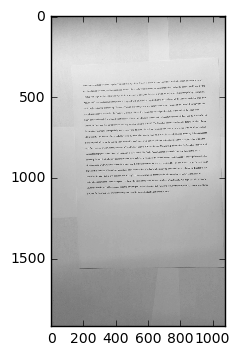

In [42]:
plt.imshow(image, cmap='gray')

In [43]:
binary = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 23) 

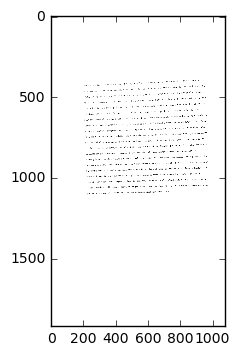

In [44]:
plt.imshow(binary, cmap='gray')

In [45]:
kernel = np.ones((13,13), np.uint8)
binary_erode = cv2.erode(binary, kernel, iterations = 1)

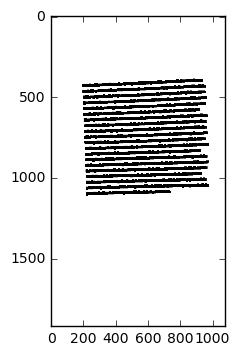

In [46]:
plt.imshow(binary_erode, cmap='gray')

In [47]:
output = cv2.connectedComponents(255 - binary_erode, 4, cv2.CV_32S)

In [ ]:
line_num = output[0]

In [33]:
line_mask = np.where(output[1] == 21, output[1], 255).astype('uint8')

In [34]:
line = 255 - cv2.bitwise_and(255 - image, 255 - line_mask)

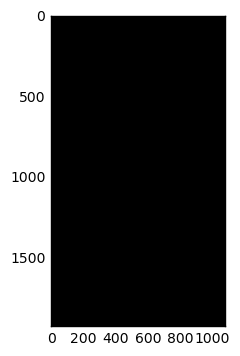

In [35]:
plt.imshow(line_mask, cmap='gray')

In [75]:
pts = np.transpose(np.nonzero(255 - line_mask))

In [76]:
ret = cv2.fitLine(pts, cv2.DIST_L2, 0, 0.01, 0.01)

In [77]:
ret

array([[  4.71548922e-02],
       [ -9.98887599e-01],
       [  4.18986572e+02],
       [  5.65401245e+02]], dtype=float32)

In [78]:
center = np.mean(pts, 0)

In [79]:
angle = np.arctan([ret[0][0] / ret[1][0]])[0] * 180 / np.pi

In [80]:
angle

-2.7027786387773887

In [81]:
M = cv2.getRotationMatrix2D((center[0]/2, center[0]/2), angle, 1)

In [82]:
rows, cols = line_mask.shape

In [84]:
h_start, w_start, height, width = cv2.boundingRect(pts)

In [85]:
delta = 100

In [99]:
local_mask = line_mask[h_start - delta:h_start + height + delta , w_start - delta:w_start + width + delta]

In [100]:
local_content = image[h_start - delta:h_start + height + delta , w_start - delta:w_start + width + delta]

In [104]:
single_line = 255 - cv2.bitwise_and(255 - local_content, 255 - local_mask)

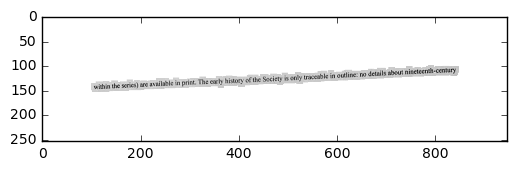

In [105]:
plt.imshow(single_line, cmap='gray')

In [106]:
rows, cols = single_line.shape

In [107]:
dst = 255 - cv2.warpAffine(255 - single_line, M, (cols, rows))

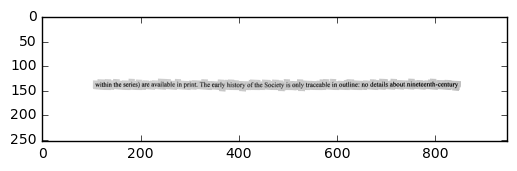

In [108]:
plt.imshow(dst, cmap='gray')

In [109]:
pts = np.transpose(np.nonzero(255 - dst))

In [110]:
h_start, w_start, height, width = cv2.boundingRect(pts)

In [111]:
delta = 0

In [112]:
output_line = dst[h_start - delta:h_start + height + delta , w_start - delta:w_start + width + delta]

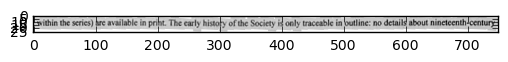

In [113]:
plt.imshow(output_line, cmap='gray')

In [114]:
output_line.shape

(27, 750)